In [114]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [115]:
import re

df.columns = (
    df.columns
      .str.lower()
      .str.strip()
      .str.replace(r"[^\w]+", "_", regex=True)
      .str.replace(r"_+", "_", regex=True)
      .str.strip("_")
)

In [116]:
print(f"Toal Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print(f"No. of Column: {len(df.columns)}")
print(f"Columns: {df.columns.tolist()}")

Toal Rows: 1000
Total Columns: 8
No. of Column: 8
Columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']


## Dataset Information
1. gender: 
2. race/ethnicity: 
3. parental level of education: 
4. lunch: 
5. test preparation course: 
6. math score: 
7. reading score: 
8. writing score: 

### Check Missing Values

In [117]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing values in the dataset.

### Check duplicated values

In [118]:
# duplicated means: same data in two rows
df.duplicated().sum()

np.int64(0)

No duplicated values in the dataset.

In [119]:
x = df.dtypes.reset_index().rename(
    columns={'index': 'column_name', 0: 'data_type'}
)

print(x)

                   column_name data_type
0                       gender    object
1               race_ethnicity    object
2  parental_level_of_education    object
3                        lunch    object
4      test_preparation_course    object
5                   math_score     int64
6                reading_score     int64
7                writing_score     int64


## Categorical Values

In [120]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [121]:
# categorical and numerical features
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print(f"Categorical Features[{len(categorical_features)}]: ", set(categorical_features))
print(f"Numerical Features[{len(numerical_features)}]: ", set(numerical_features))

Categorical Features[5]:  {'test_preparation_course', 'lunch', 'race_ethnicity', 'parental_level_of_education', 'gender'}
Numerical Features[3]:  {'reading_score', 'writing_score', 'math_score'}


In [122]:
# numeric_count = df.select_dtypes(include='number').shape[1]
# categorical_count = df.select_dtypes(exclude='number').shape[1]

# print("Numeric Columns:", numeric_count)
# print("Categorical Columns:", categorical_count)

### Unique values in each features

In [123]:
for features in categorical_features:
    print(f"{features} [{df[features].nunique()}] = ", set(df[features].unique()))

gender [2] =  {'female', 'male'}
race_ethnicity [5] =  {'group A', 'group E', 'group C', 'group B', 'group D'}
parental_level_of_education [6] =  {"bachelor's degree", 'some college', "master's degree", 'high school', 'some high school', "associate's degree"}
lunch [2] =  {'free/reduced', 'standard'}
test_preparation_course [2] =  {'completed', 'none'}


In [124]:
# for feature in categorical_features:
#     uniques = set(df[feature].unique())
#     print(f"{feature} [{len(uniques)}] = {uniques}")

## Numerical Features

In [125]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**:
- Mean: around 66-69
- Minimum: math(0), reading(17), writing(10)
- Maximum: 100

In [138]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [139]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [140]:
math_full = df[df['math_score'] == 100]['average_score'].count()
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()

print(f'No. of Students with full marks in Maths: {math_full}')
print(f'No. of Students with full marks in Writing: {writing_full}')
print(f'No. of Students with full marks in Reading: {reading_full}')

No. of Students with full marks in Maths: 7
No. of Students with full marks in Writing: 14
No. of Students with full marks in Reading: 17


In [141]:
math_lth_20 = df[df['math_score'] < 20]['average_score'].count()
reading_lth_20 = df[df['reading_score'] < 20]['average_score'].count()
writing_lth_20 = df[df['writing_score'] < 20]['average_score'].count()

print(f'No. of Students with <20 in Maths: {math_lth_20}')
print(f'No. of Students with <20 in Writing: {reading_lth_20}')
print(f'No. of Students with <20 in Reading: {writing_lth_20}')

No. of Students with <20 in Maths: 4
No. of Students with <20 in Writing: 1
No. of Students with <20 in Reading: 3


**Insights**:
- Best Performance: Reading
- Worst Performance: Maths

## 4. Exploring Data ( Visualization )

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

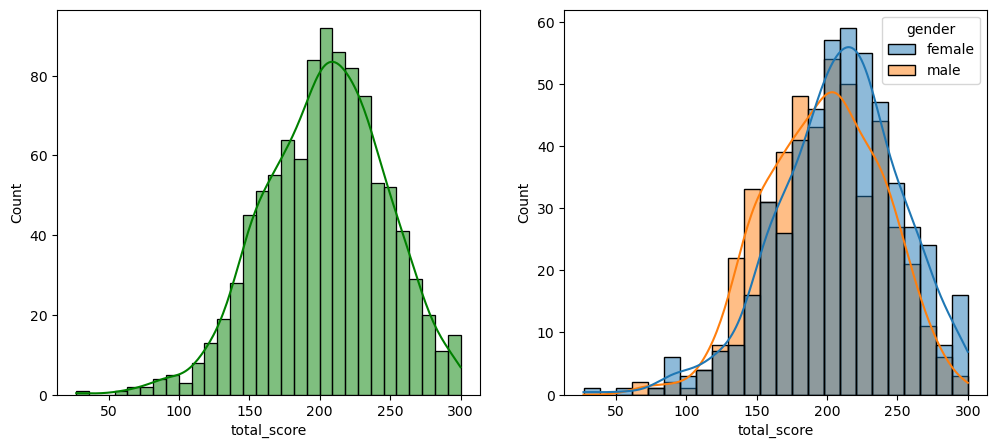

In [215]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# # fig, axs = plt.subplots(figsize=(20, 8))

plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

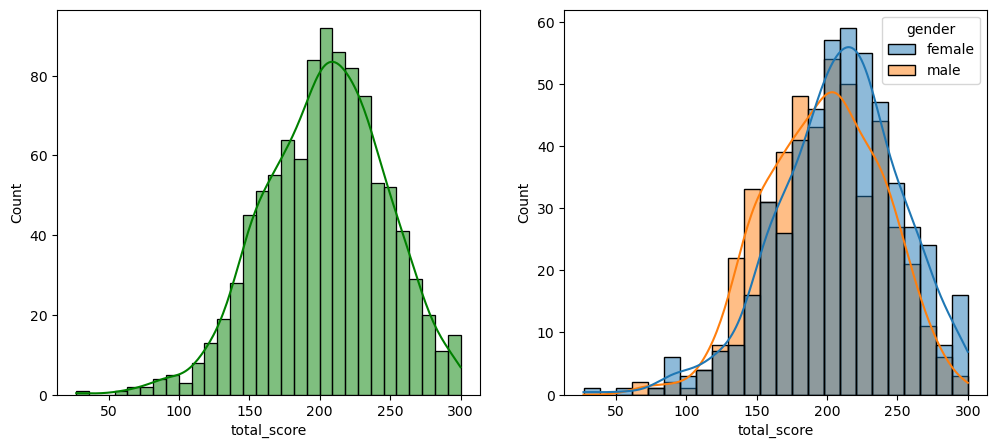

In [217]:
# ChatGPT version
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])

plt.show()

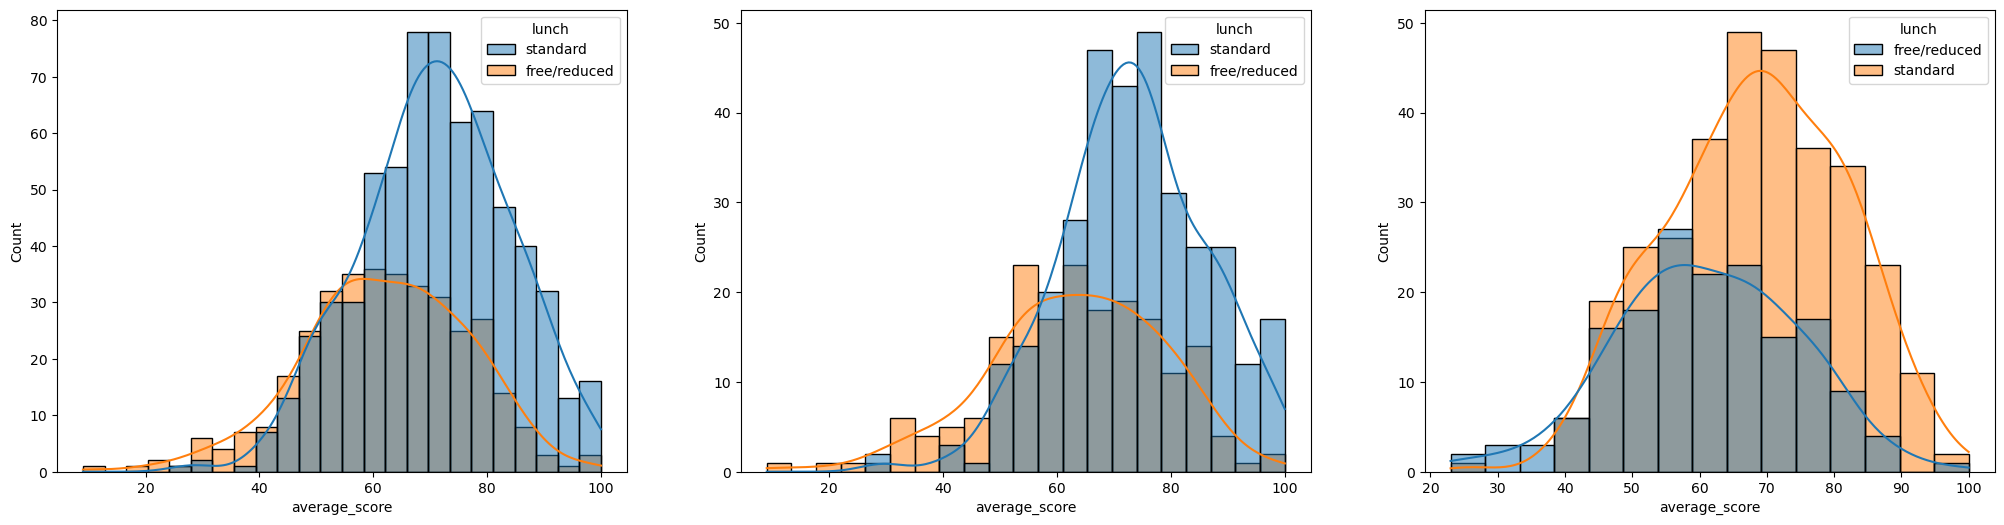

In [222]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

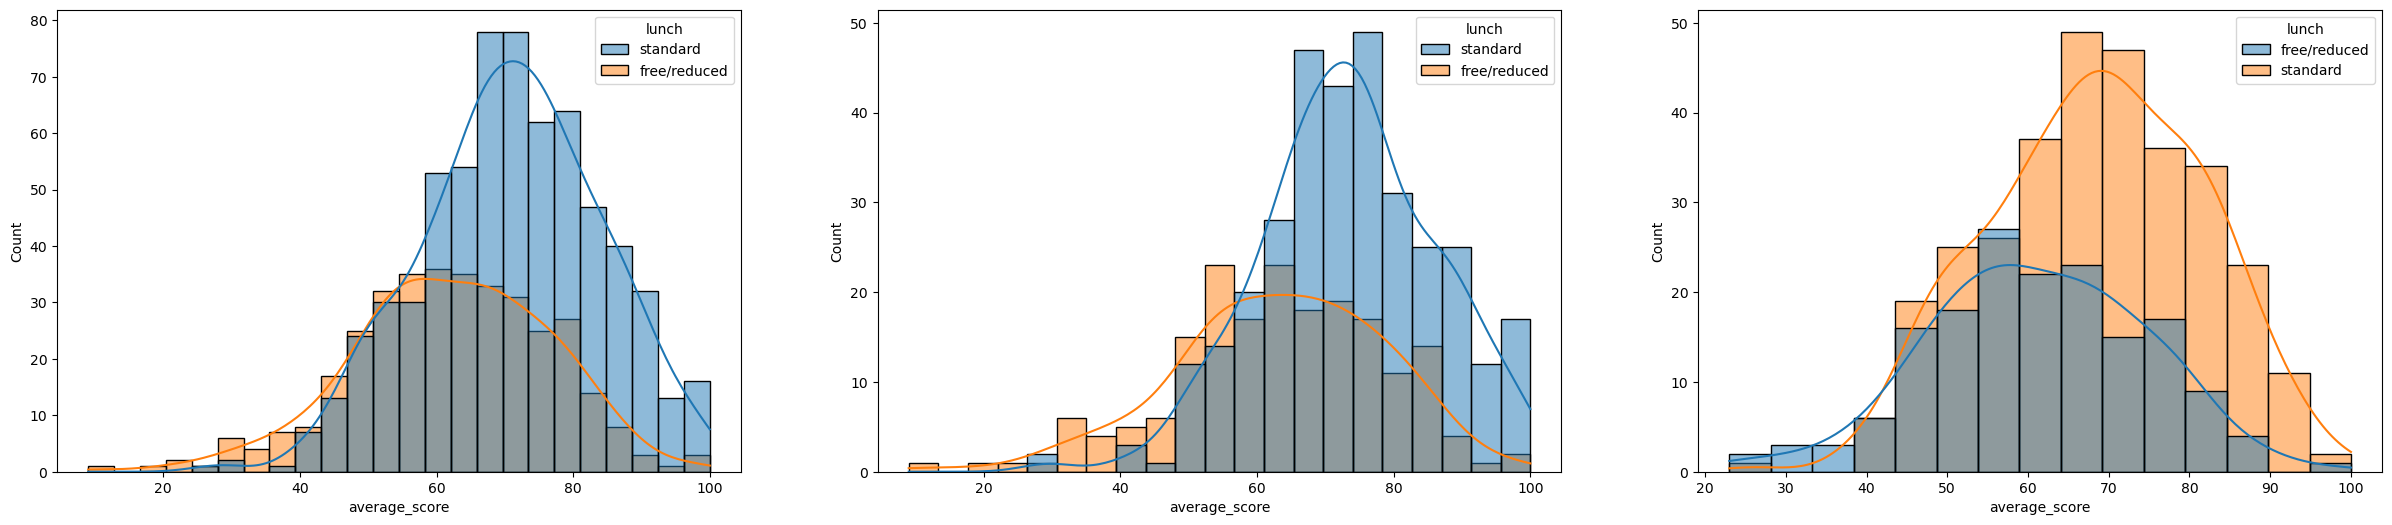

In [196]:
plt.figure(figsize=(30,6))

plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='lunch')

plt.show()

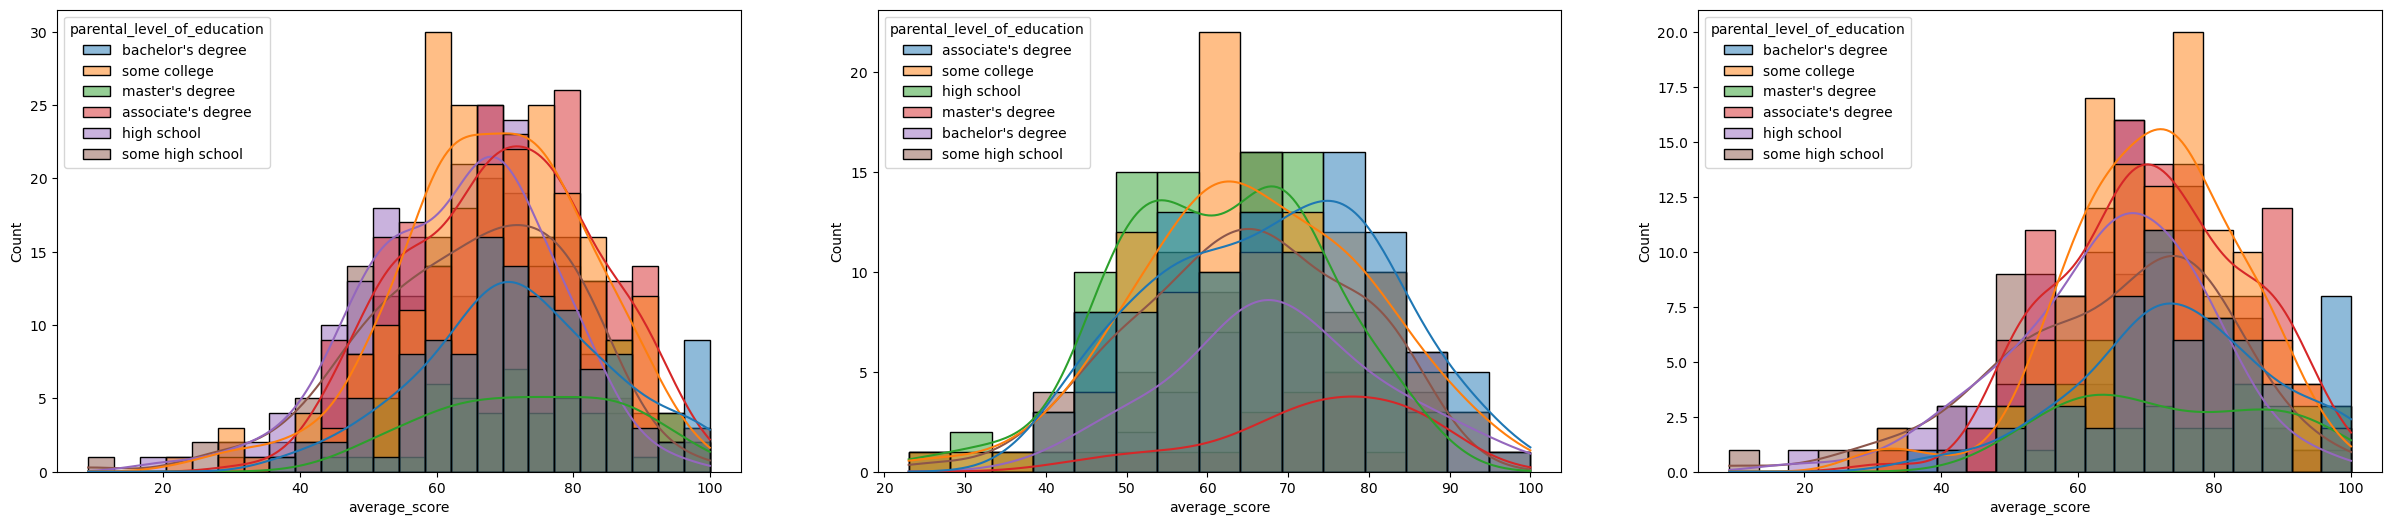

In [ ]:
plt.subplots(1,3,figsize=(30,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()